# Systematic Literature Review: Extraction of Design models from Software Requeriments Specification

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from matplotlib import style 
#plt.style.use('ggplot') 
import matplotlib.ticker as mticker
plt.style.use('seaborn-v0_8') 
import libs.plot as plot
import libs.picoc as picoc


## Main column constants definition

In [2]:
PUBLICATION_YEAR = 'Publication Year'
SYNONYMUS = 'Synonymus / Alike Terms'
TERM = 'Term'
PICOC = 'PICOC'
TITLE = 'Title'
CITED_BY = 'Cited by'
ITEM_TYPE = 'Item Type'

## Import PICOC Criteria dataset

In [3]:
dataset = pd.read_csv('data/Systematic Literature Review (SLR) - PICOC Criteria.csv')

## Create queries grouped by PICOC terms with synonyms and alike terms

In [4]:
import json

picoc_query_by_terms = {}

for index, row in dataset.iterrows():
    if row[TERM] in picoc_query_by_terms:
        picoc_query_by_terms[row[TERM]] = picoc_query_by_terms[row[TERM]] + ' OR "'+row[PICOC].upper().strip()+'"' + ' OR ' + picoc.join_synonymus(row[SYNONYMUS])
    else:
       picoc_query_by_terms[row[TERM]] = '"'+row[PICOC].upper().strip()+'"' + ' OR ' + picoc.join_synonymus(row[SYNONYMUS])
       
picoc_query_as_string = json.dumps(picoc_query_by_terms, indent=4)
print(picoc_query_as_string)

{
    "Population": "\"SOFTWARE DEVELOPMENT INDUSTRY\" OR \"SOFTWARE INDUSTRY\" OR \"IT PROJECT\" OR \"SOFTWARE PRACTITIONER\" OR \"TEAM MEMBERS\" OR \"PROGRAMMER\" OR \"SOFTWARE ARCHITECT\" OR \"SOFTWARE ANALYST\" OR \"TESTER\" OR \"SOFTWARE DEVELOPMENT LIFECYCLE\" OR \"SOFTWARE DEVELOPMENT PROCESS\" OR \"SOFTWARE PROCESS\" OR \"SOFTWARE LIFECYCLE\" OR \"AGILE METHOLODOGIES\"",
    "Intervention": "\"SOFTWARE REQUIREMENTS SPECIFICATION\" OR \"SRS\" OR \"USER HISTORIES\" OR \"USE CASE\" OR \"EPIC\" OR \"FUNCTIONAL REQUIREMENTS\" OR \"NOT FUNCTIONAL REQUIREMENTS\" OR \"SYSTEM REQUIREMENTS\" OR \"SOFTWARE DESIGN\" OR \"SOFTWARE ARCHITECTURE\" OR \"SYSTEM ARCHITECTURE\" OR \"UML\" OR \"DESIGN PATTERNS\" OR \"UNIFIED MODELING LANGUAGE\" OR \"UML\"",
    "Comparison": "\"CODE INTELLIGENCE\" OR \"LOWCODE\" OR \"LOW-CODE\" OR \"ARTIFICIAL INTELLIGENCE\" OR \"AI\" OR \"NATURAL LANGUAJE PROCESSING TECHNIQUES\" OR \"NATURAL LANGUAJE PROCESSING\" OR \"NLP\" OR \"GENERATIVE AI\" OR \"GENAI\" OR \"

## Create base query

In [5]:
base_query_array = []
for key in picoc_query_by_terms:
    base_query_array.append('('+picoc_query_by_terms[key]+')')
 
base_query = ' AND '.join(base_query_array)
print(picoc.format_query(base_query))

("SOFTWARE DEVELOPMENT INDUSTRY" OR "SOFTWARE INDUSTRY" OR "IT PROJECT" OR "SOFTWARE PRACTITIONER" OR "TEAM MEMBERS" OR "PROGRAMMER" OR "SOFTWARE ARCHITECT" OR "SOFTWARE ANALYST" OR "TESTER" OR "SOFTWARE DEVELOPMENT LIFECYCLE" OR "SOFTWARE DEVELOPMENT PROCESS" OR "SOFTWARE PROCESS" OR "SOFTWARE LIFECYCLE" OR "AGILE METHOLODOGIES") 
AND ("SOFTWARE REQUIREMENTS SPECIFICATION" OR "SRS" OR "USER HISTORIES" OR "USE CASE" OR "EPIC" OR "FUNCTIONAL REQUIREMENTS" OR "NOT FUNCTIONAL REQUIREMENTS" OR "SYSTEM REQUIREMENTS" OR "SOFTWARE DESIGN" OR "SOFTWARE ARCHITECTURE" OR "SYSTEM ARCHITECTURE" OR "UML" OR "DESIGN PATTERNS" OR "UNIFIED MODELING LANGUAGE" OR "UML") 
AND ("CODE INTELLIGENCE" OR "LOWCODE" OR "LOW-CODE" OR "ARTIFICIAL INTELLIGENCE" OR "AI" OR "NATURAL LANGUAJE PROCESSING TECHNIQUES" OR "NATURAL LANGUAJE PROCESSING" OR "NLP" OR "GENERATIVE AI" OR "GENAI" OR "MACHINE LEARNING" OR "ML" OR "DEEP LEARNING" OR "DL" OR "LARGE LANGUAGE MODELS" OR "LLM" OR "GPT" OR "PALM" OR "BERT" OR "CLAUDE"

## Save the base query string into a file

In [6]:
with open("queries/base_query.sql", "w") as text_file:
    print("{}".format(base_query), file=text_file)

## Save the scopus query string into a file

In [7]:
with open("queries/scopus_query.sql", "w") as text_file:
    print("TITLE-ABS-KEY({}) AND (LIMIT-TO(PUBYEAR,2016) OR LIMIT-TO(PUBYEAR,2017) OR LIMIT-TO(PUBYEAR,2018) OR LIMIT-TO(PUBYEAR,2019) OR LIMIT-TO(PUBYEAR,2020))".format(base_query), file=text_file)

## Articles analysis

,Publication Year,Title,Item Type,Cited by
24,2021,CodeXGLUE: A Machine Learning Benchmark Dataset for Code Understanding and Generation,Preprint,769
23,2015,UML @ Classroom: An Introduction to Object-Oriented Modeling,Book,226
1,2017,PURE: A Dataset of Public Requirements Documents,Conference paper,181
20,2011,Semi-automatic generation of UML models from natural language requirements,Conference paper,154
4,2009,An Automated Tool for Generating UML Models from Natural Language Requirements,Conference paper,152
18,2018,Automatic Transformation of User Stories into UML Use Case Diagrams using NLP Techniques,Journal article,138
16,1996,Processing natural language software requirement specifications,Conference paper,118
19,2009,Object Oriented Software Modeling Using NLP Based Knowledge Extraction,Journal article,85
25,2017,Natural Language Requirements Processing: A 4D Vision,Journal article,75
5,2018,Artificial Intelligence Techniques in Software Engineering for Automated Software Reuse and Design,Conference paper,41


Text(0.5, 1.0, 'Number of citations per article (Top 15)')

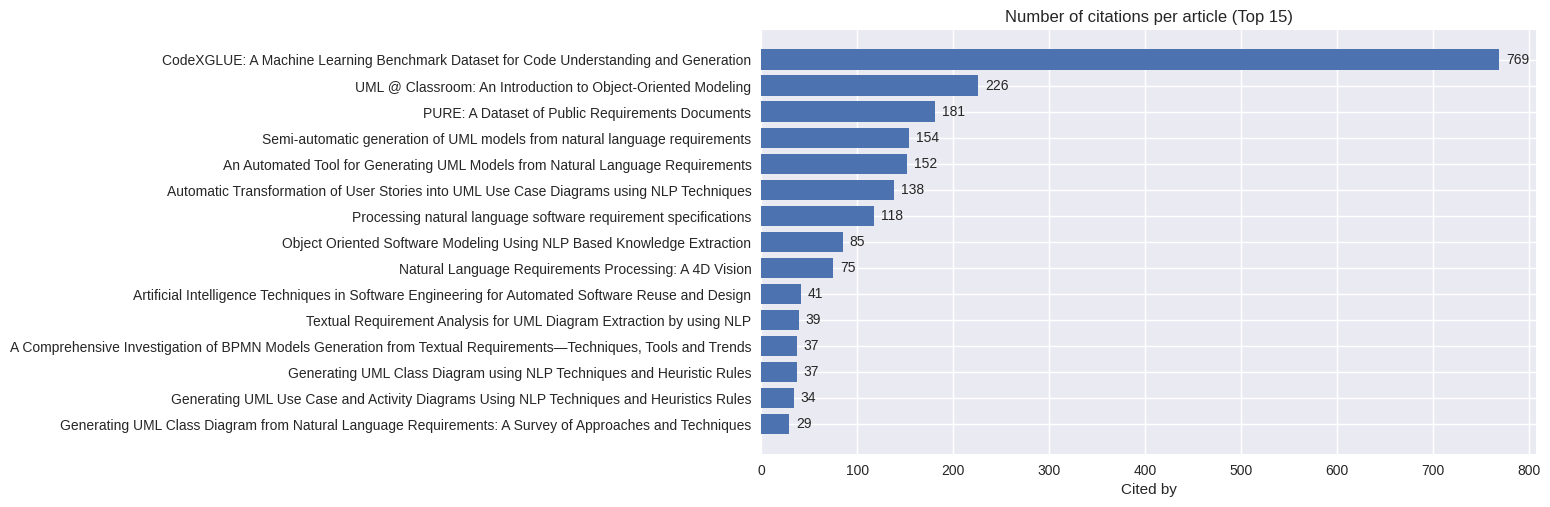

In [8]:
articles = pd.read_csv('data/articles_with_cites.csv')
articles[ITEM_TYPE] = articles[ITEM_TYPE].replace({"preprint":"Preprint","book": "Book", "bookSection":"Book section", "journalArticle": "Journal article", "conferencePaper": "Conference paper"})

articles_top = articles.sort_values(CITED_BY, ascending=False).head(15)[[PUBLICATION_YEAR,TITLE,ITEM_TYPE,CITED_BY]]
display(HTML(articles_top.to_html()))
articles_top = articles_top.sort_values(CITED_BY, ascending=True)
plt.figure().set_figwidth(10)
label = plt.barh(articles_top[TITLE], articles_top[CITED_BY])
plt.bar_label(label, label_type='edge', padding=5) #edge, center
plt.xlabel(CITED_BY)
plt.title('Number of citations per article (Top 15)')


## Articles by Publication Year

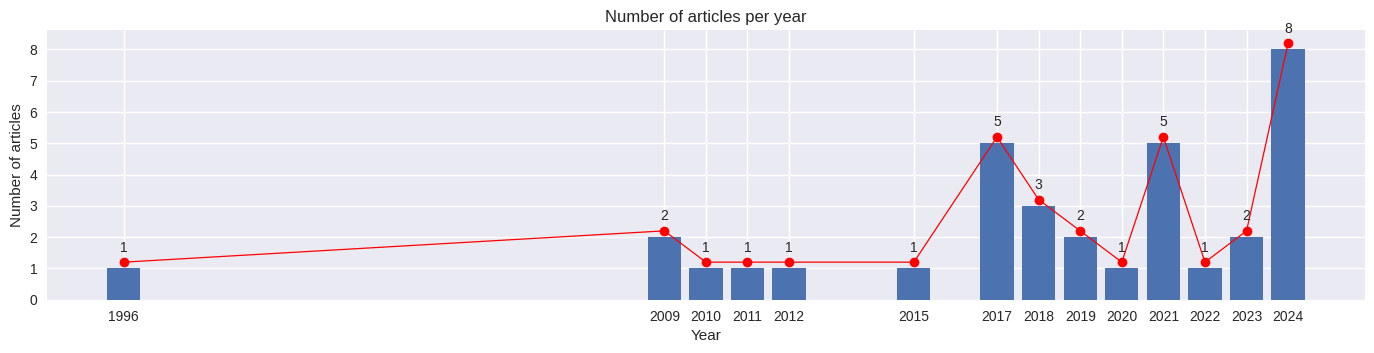

In [9]:
publication_per_year = articles.groupby([PUBLICATION_YEAR])[PUBLICATION_YEAR].count().sort_index()


plt.rcParams["figure.figsize"] = [13, 3.50]
plt.figure().set_figwidth(17)

label = plt.bar(publication_per_year.index, publication_per_year)
plt.bar_label(label, label_type='edge',  padding=10) #edge, center
plt.xticks(publication_per_year.index)
publication_per_year_with_offset = [i+.2 for i in publication_per_year.values]

plt.plot(publication_per_year.index, publication_per_year_with_offset, marker='o', color='red', linewidth=0.9)
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.title('Number of articles per year')
plt.show()

## Articles by Item Type

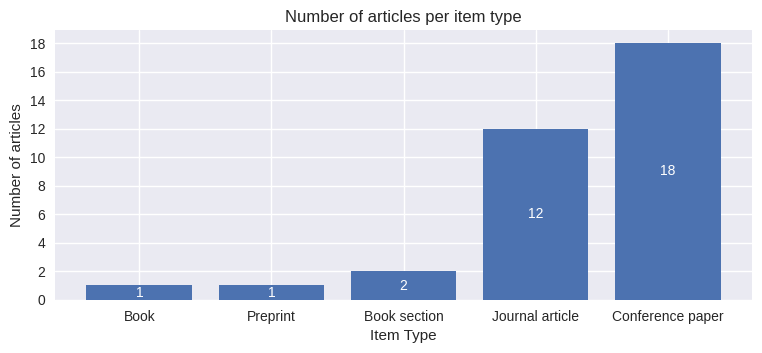

In [10]:
articles_per_item_type = articles.groupby(ITEM_TYPE)[ITEM_TYPE].count().sort_values()

plt.figure().set_figwidth(9)
label = plt.bar(articles_per_item_type.index, articles_per_item_type.values)
plt.bar_label(label, label_type='center',  padding=0, color='white') #edge, center
plt.yticks(articles_per_item_type.values)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.xlabel(ITEM_TYPE)
plt.ylabel('Number of articles')
plt.title('Number of articles per item type')
plt.show()

## Articles by Place

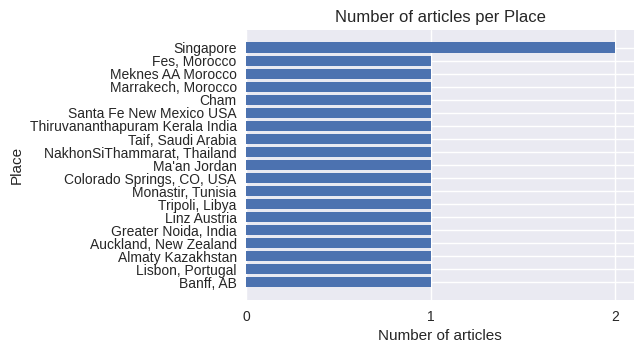

In [11]:
place = articles['Place'].value_counts().sort_values()

plt.figure().set_figwidth(5)
plt.barh(place.index, place.values)
plt.xlabel('Number of articles')
plt.ylabel('Place')
plt.title('Number of articles per Place')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()


## Article Assessment

In [12]:
articles_assessment = pd.read_csv('data/Systematic Literature Review (SLR) - Assessment.csv')

def count_by(iterable_value):
    count ={
        'no': 0,
        'partially': 0,
        'yes': 0,
    }
    for value in iterable_value:
        count[value] = count.get(value, 0) + 1
    return [count.get('no'), count.get('partially'), count.get('yes')]

# Count the occurrences of values in column A using a dictionary
q1 = count_by(articles_assessment['Q1']) 
q2 = count_by(articles_assessment['Q2']) 
q3 = count_by(articles_assessment['Q3']) 
q4 = count_by(articles_assessment['Q4']) 
q5 = count_by(articles_assessment['Q5'])
 
answers = np.array([q1, q2, q3, q4, q5])

category_names = ('No', 'Partially', 'Yes')
results = {
     'Q1': answers[0],
     'Q2': answers[1],
     'Q3': answers[2],
     'Q4': answers[3],
     'Q5': answers[4],
 }

# Result of the articles assessment

(<Figure size 920x500 with 1 Axes>, <Axes: >)

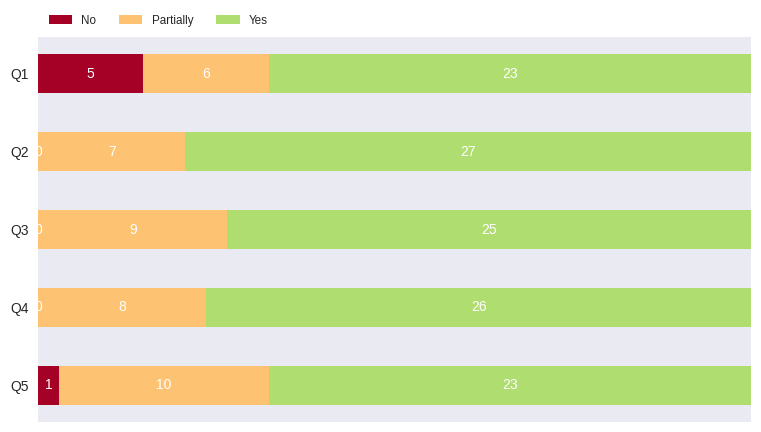

In [13]:
plot.survey(results, category_names)

In [14]:
articles_assessment_sorted = articles_assessment.sort_values(by=['Total score'], ascending=False)

display(HTML(articles_assessment_sorted.to_html()))

,Title,Q1,Q2,Q3,Q4,Q5,Total score
0,A Comparison of Transforming the User Stories and Functional Requirements into UML Use Case Diagram,yes,yes,yes,yes,yes,5.0
3,An Algorithmic Approach for Generating Behavioral UML Models Using Natural Language Processing,yes,yes,yes,yes,yes,5.0
31,Sketch2Process: End-to-End BPMN Sketch Recognition Based on Neural Networks,yes,yes,yes,yes,yes,5.0
9,Extracting UML class diagrams from software requirements in Thai using NLP,yes,yes,yes,yes,yes,5.0
8,Automatic Transformation of Natural to Unified Modeling Language: A Systematic Review,yes,yes,yes,yes,yes,5.0
7,Automated Derivation of UML Sequence Diagrams from User Stories: Unleashing the Power of Generative AI vs. a Rule-Based Approach,yes,yes,yes,yes,yes,5.0
11,Generating UML Class Diagram from Natural Language Requirements: A Survey of Approaches and Techniques,yes,yes,yes,yes,yes,5.0
10,From Requirements Engineering to UML using Natural Language Processing – Survey Study,yes,yes,yes,yes,yes,5.0
33,Extraction of UML class diagrams using deep learning: Comparative study and critical analysis,yes,yes,yes,yes,yes,5.0
29,Towards an Automatic Extracting UML Class Diagram from System's Textual Specification,yes,yes,yes,yes,yes,5.0


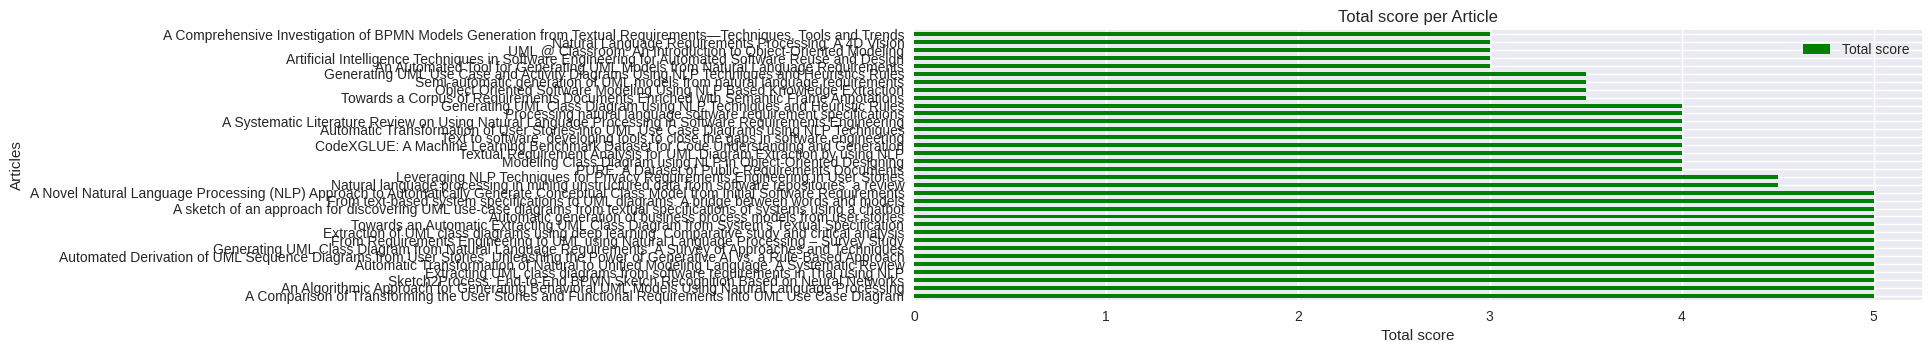

In [15]:
articles_assessment_sorted = articles_assessment_sorted[[TITLE,'Total score']]
articles_assessment_sorted.plot.barh(color='green', x='Title', y='Total score')

plt.xlabel('Total score')
plt.ylabel('Articles')
plt.title('Total score per Article')
plt.show()